In [1]:
import morphopy
print(morphopy.__file__)

/Users/paniga1/connects_neuvue/MorphoPy/morphopy/__init__.py


In [2]:
"""
Purpose:
--------
Demonstrate how to query the h01 c2 datajoint data products
using the modularized API class
"""

'\nPurpose:\n--------\nDemonstrate how to query the h01 c2 datajoint data products\nusing the modularized API class\n'

In [3]:
%load_ext autoreload
%autoreload 2

In [37]:
import connects_neuvue

In [5]:
connects_neuvue

<module 'connects_neuvue' from '/Users/paniga1/connects_neuvue/connects_neuvue/__init__.py'>

In [6]:
import neuron_morphology_tools

In [7]:
neuron_morphology_tools

<module 'neuron_morphology_tools' from '/Users/paniga1/connects_neuvue/neuron_morphology_tools/neuron_morphology_tools/__init__.py'>

In [8]:
import datasci_tools
datasci_tools

<module 'datasci_tools' from '/Users/paniga1/connects_neuvue/datasci_tools/datasci_tools/__init__.py'>

# Step 1: Import API and configure API object with aws secret

In [9]:
from connects_neuvue.utils import aws_utils as aws
secret_dict = aws.get_secret()

In [10]:
from connects_neuvue.h01_c2 import api
fetcher = api.API(secret_dict=secret_dict)
fetcher

/Users/paniga1/connects-neuvue/lib/python3.13/site-packages/datajoint/plugin.py:4: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
/Users/paniga1/connects_neuvue/connects_neuvue/h01_c2/api.py:27: UserWarning: neurd.neuron_visualizations not found, some visualizations will not work. Please install the neurd package to enable visualizations
  warn("neurd.neuron_visualizations not found, some visualizations will not work. "
[2025-07-25 11:15:32,182][INFO]: DataJoint 0.14.5 connected to admin@neurd-datajoint.cluster-cjc6cqmcqirl.us-east-1.rds.amazonaws.com:3306


# Application 0: Fetch soma features

In [11]:
segment_id = 3748267179
key = dict(segment_id=segment_id)

In [12]:
soma_center = fetcher.fetch_soma_center(segment_id)
soma_center

array([260427, 157798,   1276])

In [13]:
mesh = fetcher.fetch_segment_id_mesh(**key)

In [14]:
mesh

<trimesh.Trimesh(vertices.shape=(438686, 3), faces.shape=(830451, 3))>

In [15]:
fetcher.soma_table & key

segment_id ID for segment in this materialization,decimation_ratio,soma_idx,centroid_x (EM voxels),centroid_y (EM voxels),centroid_z (EM voxels),centroid_x_nm nm x coordinate of soma,centroid_y_nm nm y coordinate of soma,centroid_z_nm nm z coordinate of soma,n_vertices number of vertices in mesh,n_faces number of faces in mesh,n_synapses_pre number of synapses coming from soma,n_synapses_post number of synapses onto soma,sdf sdf width,volume volume in billions of nm^3 of the convex hull,surface_area surface area in millions of nm^2,max_side_ratio maximum of side length ratios used in check_if_soma,bbox_volume_ratio ratio of (axis aligned) bbox volume to mesh volume used in check_if_soma,max_hole_length euclidean distance of maximum hole size
3748267179,0.18,1,260427,157798,1276,2083421.3158671334,1262389.5345549379,42109.4533546078,29142,58411,4,15,0.8,2855.841,1011.242,1.326,2.637,307642.252


In [16]:
soma_mesh = fetcher.fetch_soma_mesh(
    original_mesh = mesh,
    plot_soma=True,
    **key)
soma_mesh

Plotting soma: <trimesh.Trimesh(vertices.shape=(29142, 3), faces.shape=(58411, 3))>


/Users/paniga1/connects-neuvue/lib/python3.13/site-packages/traittypes/traittypes.py:97: UserWarning: Given trait value dtype "float64" does not match required type "float64". A coerced copy has been created.
  warnings.warn(


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

<trimesh.Trimesh(vertices.shape=(29142, 3), faces.shape=(58411, 3))>

In [17]:
from datasci_tools import ipyvolume_utils as ipvu
ipvu.plot_objects(
    mesh,
    meshes = [soma_mesh],
    meshes_colors="red",
)

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

# Application 1: Fetch whole segment autoproofread meta data

In [18]:
segment_df = fetcher.autoproof_segment_metadata_df()
segment_df

,segment_id,decimation_ratio,split_index,multiplicity,cell_type_used,cell_type,nucleus_id,nuclei_distance,n_nuclei_in_radius,n_nuclei_in_bbox,...,dendrite_bbox_x_min_soma_relative,dendrite_bbox_y_min_soma_relative,dendrite_bbox_z_min_soma_relative,dendrite_bbox_x_max_soma_relative,dendrite_bbox_y_max_soma_relative,dendrite_bbox_z_max_soma_relative,dendrite_n_limbs,dendrite_soma_angle_max,dendrite_soma_angle_min,run_time
0,315456094,0.18,0,1,baylor,inhibitory,45199,1721.34,1,1,...,-22662.193132,-26915.034769,-10519.310179,77659.254725,91980.735059,38164.973008,6,140.22,73.92,174.24
1,316084337,0.18,0,1,baylor,inhibitory,39859,1350.79,1,1,...,-22850.811617,-34456.521805,-18616.702406,56568.183237,1020.546772,28242.228707,3,90.66,57.31,36.75
2,329165083,0.18,0,1,baylor,excitatory,23149,1203.74,1,1,...,-92291.801581,-71594.365793,-7855.278694,139893.012464,72588.678945,46056.564514,3,171.27,34.87,195.07
3,329194148,0.18,0,1,baylor,inhibitory,27603,3277.04,1,1,...,-61018.619869,-24343.186433,-33133.865503,31899.321704,74910.134497,20883.529414,4,134.35,32.84,1310.60
4,329209033,0.18,0,1,baylor,excitatory,23133,4314.61,1,1,...,-150704.942416,-186883.511820,-18012.062614,150966.405344,114926.248996,36684.408015,4,141.96,27.89,665.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11258,103920063640,0.18,0,1,baylor,excitatory,26935,6175.12,1,1,...,-10495.948032,-7958.492572,-7129.511359,25381.474409,234.943864,2915.878703,2,77.15,67.55,19.28
11259,104138611432,0.18,0,1,baylor,excitatory,44586,1810.11,1,1,...,-9034.727402,-5057.600213,-7181.740459,21054.906972,43858.677572,4727.366060,2,128.31,123.47,23.26
11260,104298141834,0.18,0,1,baylor,inhibitory,44569,2092.23,1,1,...,-5303.716358,-53325.394381,-6178.310094,7707.369964,7701.971093,3766.163718,1,90.03,90.03,22.31
11261,104342178100,0.18,0,1,baylor,inhibitory,44570,1988.12,1,1,...,-31786.172042,-79824.656508,-6563.440014,2133.360885,0.000000,466.079022,1,20.14,20.14,20.10


# Application 2: Fetch neuron branch level nx object

In [19]:
segment_id = 3905170220
G = fetcher.nx_graph_autoproof_from_segment_id(segment_id) 
G

In [20]:
G.nodes()

NodeView(('S0', 'L0_1', 'L0_0', 'L0_2', 'L1_1', 'L1_0', 'L1_2', 'L2_0', 'L2_1', 'L2_2', 'L3_1', 'L3_0', 'L3_2', 'L4_2', 'L4_0', 'L4_1', 'L5_0', 'L6_1', 'L6_0', 'L6_2', 'L6_3'))

In [21]:
# get a branch-level specific metdata (includes bounding box)
G.nodes["L4_0"]

{'area': 138.83320407907544,
 'compartment': 'basal',
 'axon_compartment': 'dendrite',
 'boutons_cdfs': None,
 'boutons_volume': None,
 'labels': [np.str_('basal')],
 'mesh_center': array([1320914.978125  , 1280018.84615385,   72421.62306731]),
 'endpoint_upstream': array([1323284.34938104, 1274064.34517519,   64586.1047411 ]),
 'endpoint_downstream': array([1328795.16691901, 1291631.56195766,   85179.14923589]),
 'mesh_volume': np.float64(840.072917431375),
 'n_boutons': 0,
 'n_spines': 0,
 'n_synapses': 8,
 'n_synapses_head': 0,
 'n_synapses_neck': 0,
 'n_synapses_no_head': 0,
 'n_synapses_post': 3,
 'n_synapses_pre': 5,
 'n_synapses_shaft': 8,
 'n_synapses_spine': 0,
 'skeletal_length': 43810.09206897271,
 'spine_density': 0.0,
 'spine_volume_density': 0,
 'spine_volume_median': 0,
 'synapse_density': 0.00018260632704001503,
 'synapse_density_post': 6.847737264000563e-05,
 'synapse_density_pre': 0.0001141289544000094,
 'total_spine_volume': 0,
 'width': np.float64(535.4190017800083)

### (Optional) Visualize if you installed the neuron_morphology_tools packaged

In [22]:
try:
    from neuron_morphology_tools import neuron_nx_utils as nxu
except:
    raise Exception("install neuron_morphology_tools: \npip3 install git+https://github.com/reimerlab/neuron_morphology_tools.git")

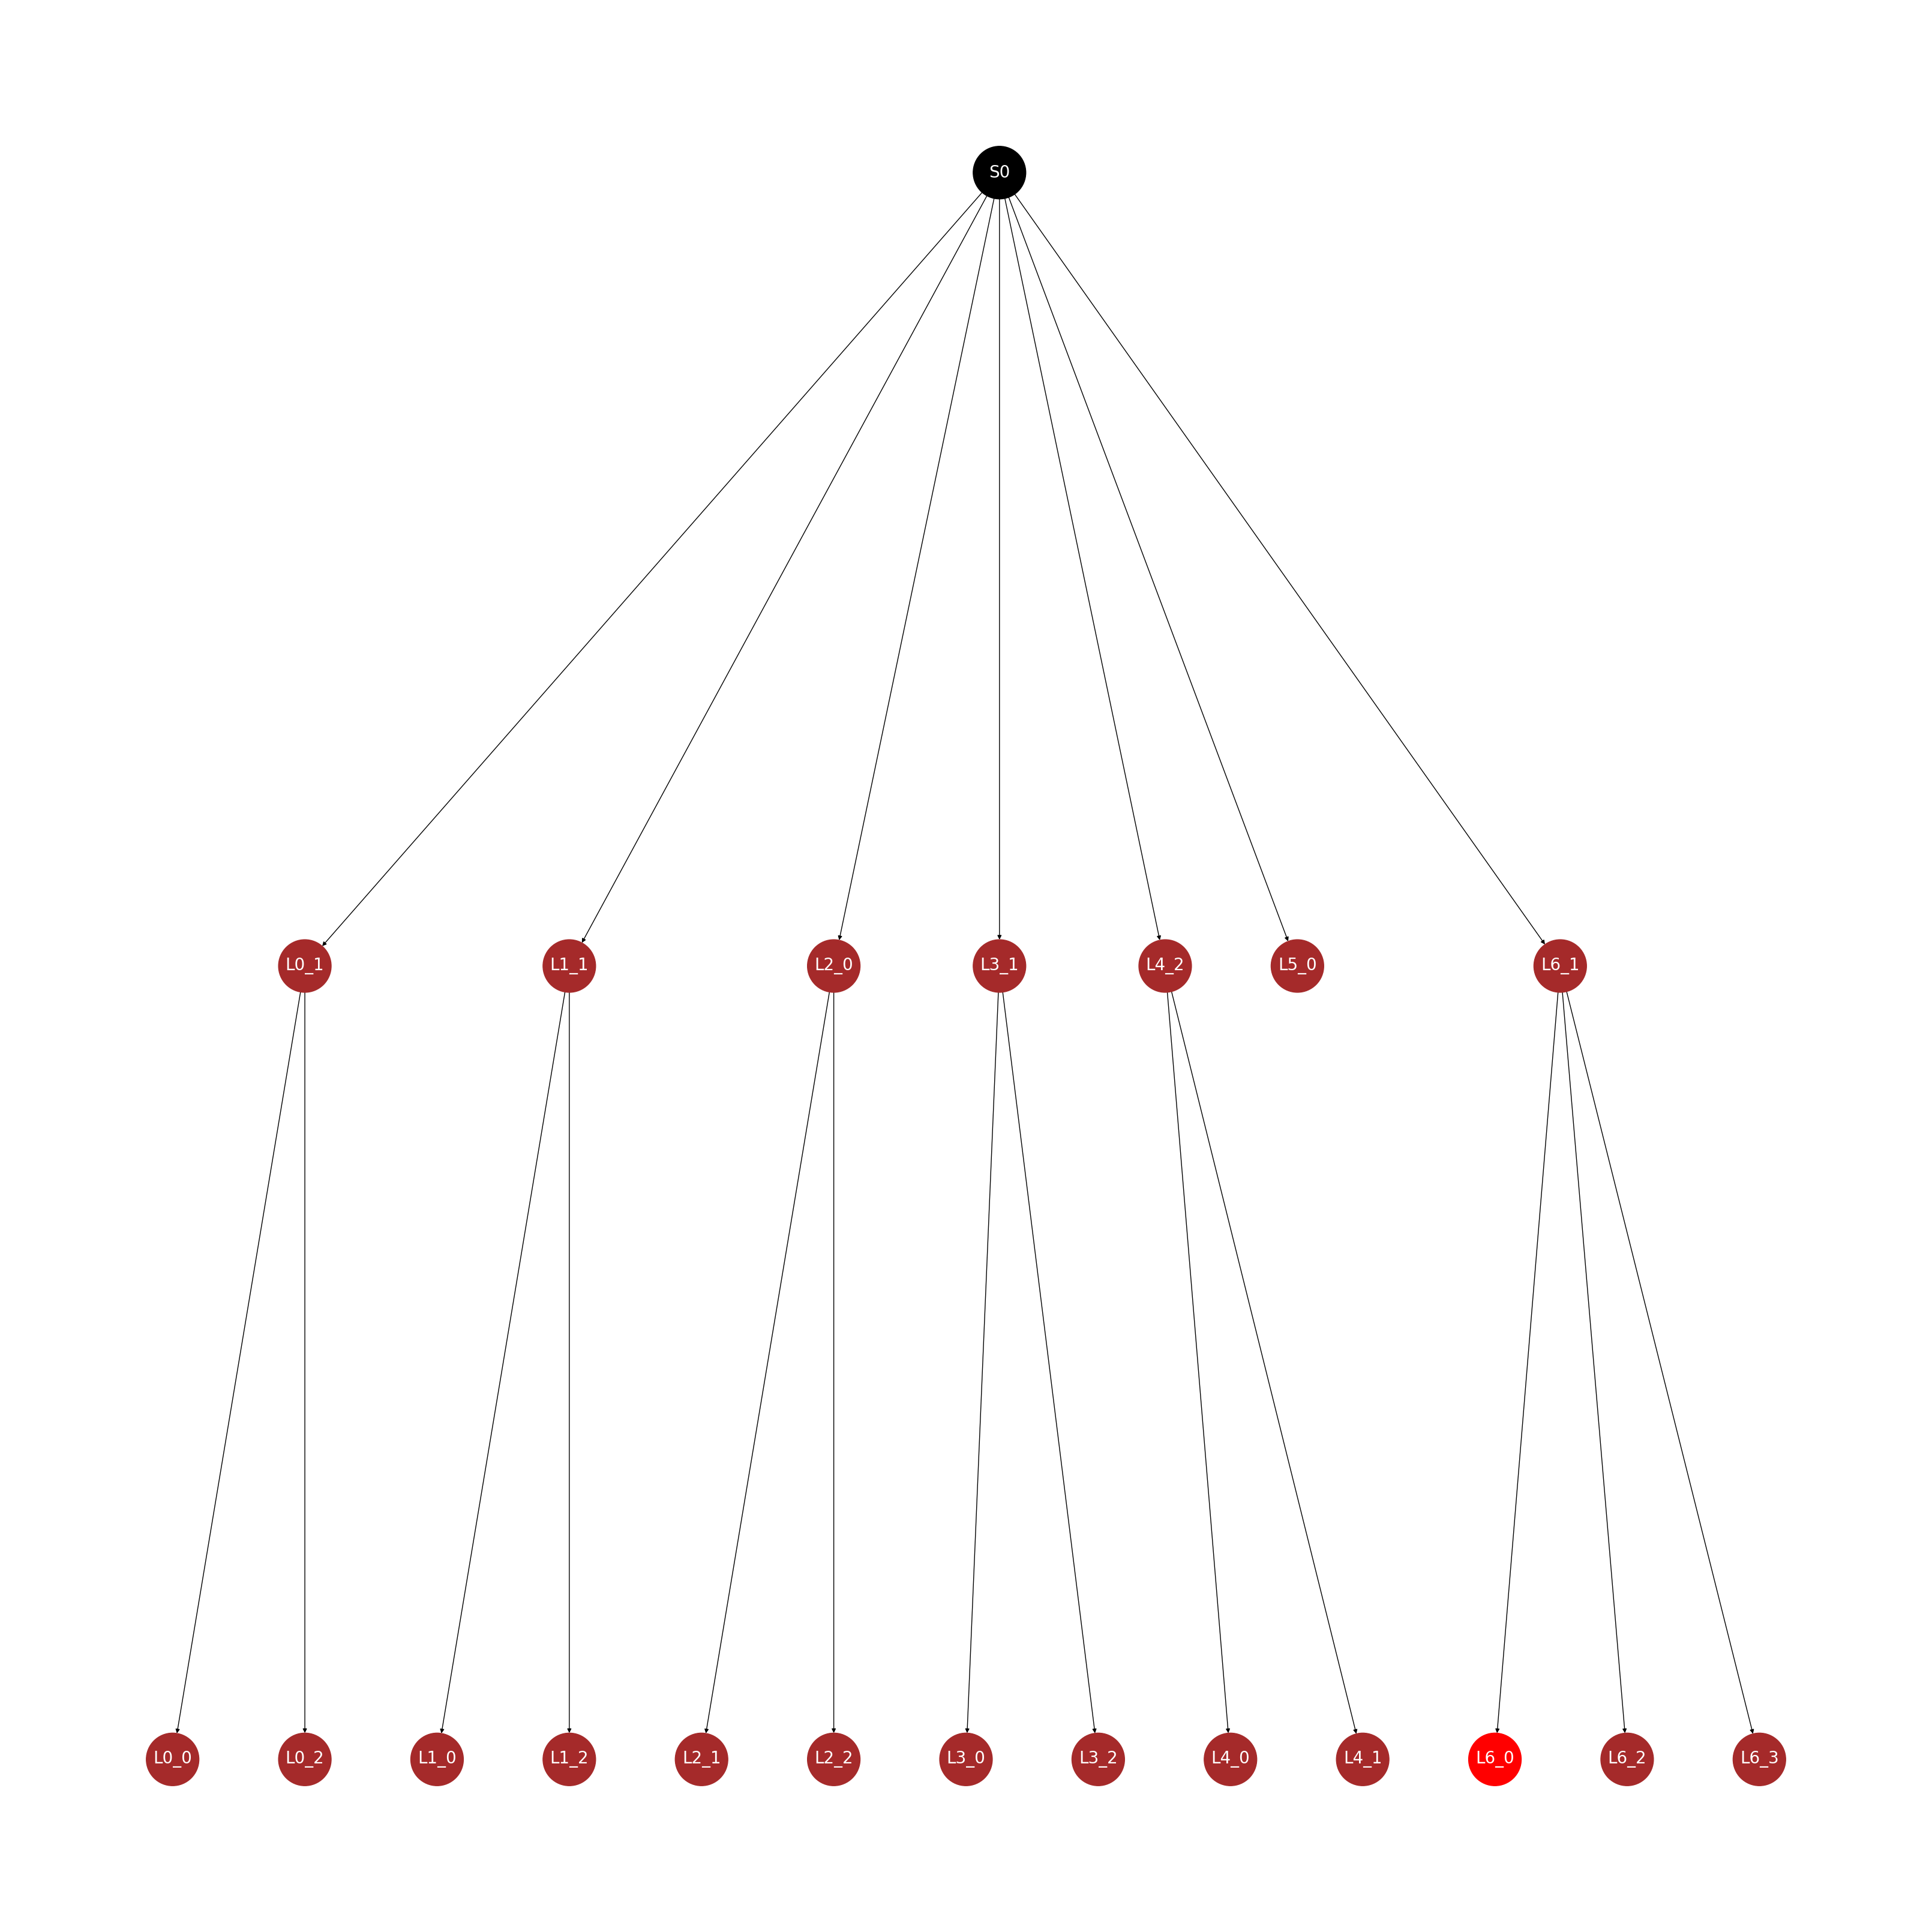

In [23]:
nxu.draw_tree(G)

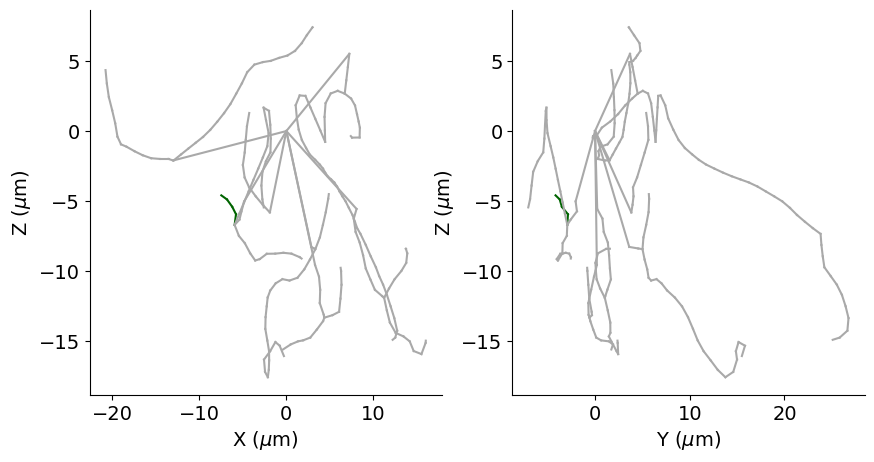

In [24]:
nxu.plot(G)

# Application 3: Fetch split points

In [25]:
"""
Current populated segments

38115897621
3748267179

"""

'\nCurrent populated segments\n\n38115897621\n3748267179\n\n'

In [26]:
split_df = fetcher.red_blue_split_df_from_segment_id(
    segment_id = 3748267179,
    split_index = 0,
)
split_df

,segment_id,split_index,error_type,cut_id,filter_cut_id,limb_name,limb_split_idx,skeletal_length,parent_branch_width,valid_points,...,parent_children_skeletal_angle_max,parent_children_skeletal_angle_min,parent_sibling_angle_smooth_max,parent_sibling_angle_smooth_min,parent_sibling_angle_smooth_extra_offset_max,parent_sibling_angle_smooth_extra_offset_min,parent_downstream_endnode_skeletal_distance_from_soma,merge_coordinate_x_nm,merge_coordinate_y_nm,merge_coordinate_z_nm
0,3748267179,0,axon_on_dendrite_merges,0,0,L0,0,12924.237,425.839489,"[[2113661.6666666665, 1221990.6666666667, 5237...",...,54.71,26.89,78.10,78.10,74.23,74.23,44151.477314,2.113685e+06,1.221869e+06,52453.845183
1,3748267179,0,axon_on_dendrite_merges,1,1,L4,0,9161.766,352.972299,"[[2062789.3333333333, 1313295.6666666667, 7210...",...,129.04,6.23,84.83,84.83,75.50,75.50,75915.300377,2.062118e+06,1.313934e+06,71982.795851
2,3748267179,0,high_degree_branching,2,0,L1,0,224864.902,257.868245,"[[2067451.6666666667, 1279625.0, 36703.1466666...",...,88.79,19.99,NaN,NaN,NaN,NaN,17480.021590,2.067034e+06,1.280051e+06,36061.864492


# Application 4: Fetching AutoProofread Meshes and Skeletons

In [27]:
key = dict(
    segment_id = 3748267179,
)

In [28]:
decimated_mesh = fetcher.fetch_segment_id_mesh(**key)

In [29]:
proofread_mesh = fetcher.fetch_proofread_mesh(
    original_mesh = decimated_mesh,
    **key)
proofread_mesh

<trimesh.Trimesh(vertices.shape=(234504, 3), faces.shape=(483269, 3))>

In [30]:
proofread_skeleton = fetcher.fetch_proofread_skeleton(
    **key)
proofread_skeleton

array([[[2090520.44897959, 1254639.28571429,   40399.19602041],
        [2092322.15028317, 1255227.96124652,   39929.40885387]],

       [[2092322.15028317, 1255227.96124652,   39929.40885387],
        [2092360.17464039, 1255144.49580397,   39969.25440767]],

       [[2092360.17464039, 1255144.49580397,   39969.25440767],
        [2092398.19899761, 1255061.03036142,   40009.09996147]],

       ...,

       [[2083421.31586713, 1262389.53455494,   42109.45335461],
        [2074659.5       , 1262874.515625  ,   36975.49390625]],

       [[2083421.31586713, 1262389.53455494,   42109.45335461],
        [2075001.71928172, 1261594.14445105,   48699.57291952]],

       [[2083421.31586713, 1262389.53455494,   42109.45335461],
        [2081797.        , 1267915.        ,   52473.15      ]]],
      shape=(30506, 2, 3))

In [31]:
from datasci_tools import ipyvolume_utils as ipvu
ipvu.plot_objects(
    mesh,
    meshes = [proofread_mesh],
    meshes_colors="red",
    skeletons = [proofread_skeleton],
    skeletons_colors="blue",
)

/Users/paniga1/connects-neuvue/lib/python3.13/site-packages/traittypes/traittypes.py:97: UserWarning: Given trait value dtype "float64" does not match required type "float64". A coerced copy has been created.
  warnings.warn(


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

### Fetching the proofread axon, dendrite separtely

In [32]:
decimated_mesh = fetcher.fetch_segment_id_mesh(**key)

In [34]:
import numpy as np

In [36]:
dendrite_mesh = fetcher.fetch_proofread_mesh_dendrite(original_mesh=decimated_mesh,**key)
dendrite_skeleton = fetcher.fetch_proofread_skeleton_dendrite(**key)
axon_mesh = fetcher.fetch_proofread_mesh_axon(original_mesh=decimated_mesh,**key)
axon_skeleton = fetcher.fetch_proofread_skeleton_axon(**key)
soma_mesh = fetcher.fetch_soma_mesh(original_mesh=decimated_mesh,**key)

dendrite_color = "purple"
axon_color = "red"
soma_color = "brown"

meshes = [dendrite_mesh,axon_mesh,soma_mesh]
skeletons = [dendrite_skeleton,axon_skeleton]
colors = [dendrite_color,axon_color]
meshes_colors = colors + [soma_color]

ipvu.plot_objects(
    decimated_mesh,
    meshes = meshes,
    meshes_colors=meshes_colors,
    skeletons = skeletons,
    skeletons_colors=colors,
)

/Users/paniga1/connects-neuvue/lib/python3.13/site-packages/traittypes/traittypes.py:97: UserWarning: Given trait value dtype "float64" does not match required type "float64". A coerced copy has been created.
  warnings.warn(


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…